# Perceptron Lab





In [95]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

## 1. (40%) Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch.
- A way to create a random train/test split. Write your own. In the future you can use the scikit-learn version if you want.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. do not attempt batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no significant improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Use your perceptron to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident it is correct, run your perceptron on the Evaluation data with the same parameters, and include your final weights in your report PDF.

In [96]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None, epochs=10):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.length =  X.shape[1] + 1
        self.weights = self.initialize_weights() if not initial_weights else initial_weights
        self.weights = np.array(self.weights)
        self.misclass = []
        X_og = X.copy()
        y_og = y.copy()
        x_len = X.shape[1] + 1
        X = np.column_stack((X, np.ones(X.shape[0])))
        
        for j in range(epochs):
            passed = True
            if self.shuffle:
                curr_X, curr_y = self._shuffle_data(X, y)
            else:
                curr_X, curr_y = X, y
            self.misclass.append(1-self.score(X_og, y_og))
            for i in range(len(X)):
                if sum((curr_X[i]*self.weights)) > 0 and curr_y[i] == 0.0:
                    delta_weight = self.lr*(curr_y[i] - 1)*curr_X[i]
                    passed = False
                elif sum((curr_X[i]*self.weights)) <= 0 and curr_y[i] == 1.0:
                    delta_weight = self.lr*(curr_y[i] - 0)*curr_X[i]
                    passed = False
                else:
                    delta_weight = np.zeros(x_len)
                self.weights += delta_weight
            if passed:
                self.epochs = j
                break
            else: 
                self.epochs = epochs
        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        X = np.column_stack((X, np.ones(X.shape[0])))
        nets = [sum((X[i]*self.weights)) for i in range(len(X))]
        return [1 if x > 0 else 0 for x in nets]

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        
        return np.random.uniform(0,1,self.length)

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return np.mean(y==self.predict(X))

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        z = np.column_stack([X, y])
        np.random.shuffle(z)
        return z[:,:-1], z[:,-1]

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights

## 1.1 Debug 

Debug your model by running it on the [debug dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff)

Parameters:

Learning Rate = 0.1\
Deterministic = 10 [This means run it 10 epochs and should be the same everytime you run it]\
Shuffle = False\
Initial Weights = All zeros

---

Expected Results

Accuracy = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [97]:
from scipy.io import arff
import pandas as pd

!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output debug-dataset.arff

dataset = arff.loadarff("datasets/linsep2nonorigin.arff")
data = pd.DataFrame(dataset[0], dtype=np.float)
X = data.drop(columns=['class']).to_numpy()
y = data['class'].to_numpy()

perp = PerceptronClassifier(0.1, shuffle=False)
perp.fit(X, y, [0., 0., 0.])
print(perp.weights)
print(perp.score(X, y))

# Train on debug data

# Check accuracy and weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0    345      0 --:--:-- --:--:-- --:--:--   345
[-0.23  0.18 -0.1 ]
0.875


## 1.2 Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff)

In [98]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output eval-dataset.arff

dataset = arff.loadarff("datasets/data_banknote_authentication.arff")
data = pd.DataFrame(dataset[0], dtype=np.float)
X = data.drop(columns=['class']).to_numpy()
y = data['class'].to_numpy()

perp = PerceptronClassifier(0.1, shuffle=False)
perp.fit(X, y)
print(perp.weights)
print(perp.score(X, y))

# Train on evaluation data

# Print weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46685  100 46685    0     0   118k      0 --:--:-- --:--:-- --:--:--  118k
[-4.02936398 -2.16558534 -2.89791429 -1.02584835  4.75858611]
0.9774052478134111


## 2. (10%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.
- Graph each dataset

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

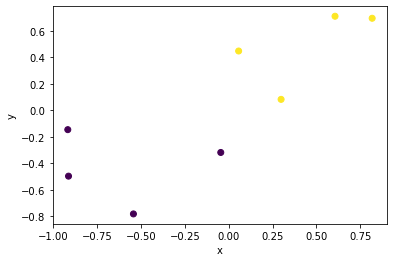

In [99]:
# Create 2 datasets
X_1 = np.vstack([np.random.uniform(-1, 0, (4,2)), np.random.uniform(0, 1, (4,2))])
y_1 = np.hstack([np.zeros(4), np.ones(4)])
plt.scatter(*X_1.T, c=y_1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


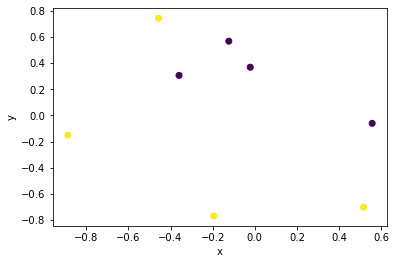

In [100]:
X_2 = np.vstack([np.random.uniform(-1, 1, (4,2)), np.random.uniform(-1, 1, (4,2))])
y_2 = np.hstack([np.zeros(4), np.ones(4)])
plt.scatter(*X_2.T, c=y_2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 3. (10%) Train on both sets with your perceptron code.

- Use a couple different learning rates.


In [101]:
perp = PerceptronClassifier(0.5, shuffle=False)
perp.fit(X_1, y_1)
print(perp.weights)
print(perp.epochs)

perp1 = PerceptronClassifier(0.2, shuffle=False)
perp1.fit(X_2, y_2)
print(perp1.weights)
print(perp1.epochs)

[0.86820376 0.92215201 0.2262963 ]
1
[-0.25208006 -0.24539742  0.08446259]
10


Discuss the effect of learning rate, including how many epochs are completed before stopping. (For these cases, learning rate should have minimal effect, unlike with the Backpropagation lab.)


*After trying many different learning rates on both datasets, I found learning rate had very little effect on how many epochs were completed. Rather, it seems that the number of epochs depends on whether or not a dataset is linearly separable. If it is not linearly separable the weights will always keep changing with every epoch.*


## 4. (10%) Graph the instances and decision line for the two cases above (with LR=.1)
 
 - For all graphs always label the axes!

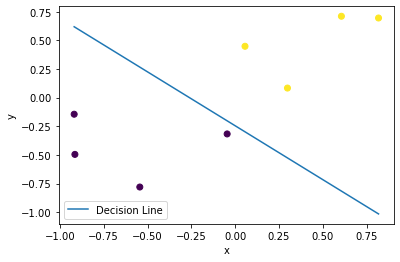

In [102]:
y_sep1 = lambda x: (-(perp.get_weights()[2] / perp.get_weights()[1]) / (perp.get_weights()[2] / perp.get_weights()[0]))*x + (-perp.get_weights()[2] / perp.get_weights()[1])
plt.scatter(*X_1.T, c=y_1)
plt.plot(np.array(sorted(X_1[:, 0], reverse=True)), y_sep1(np.array(sorted(X_1[:, 0], reverse=True))), label='Decision Line')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

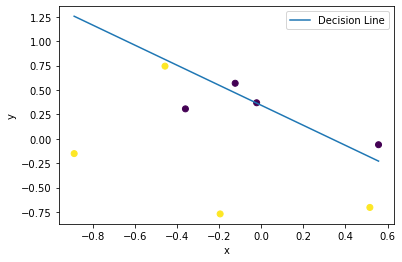

In [103]:
y_sep1 = lambda x: (-(perp1.get_weights()[2] / perp1.get_weights()[1]) / (perp1.get_weights()[2] / perp1.get_weights()[0]))*x + (-perp1.get_weights()[2] / perp1.get_weights()[1])
plt.scatter(*X_2.T, c=y_1)
plt.plot(np.array(sorted(X_2[:, 0], reverse=True)), y_sep1(np.array(sorted(X_2[:, 0], reverse=True))), label='Decision Line')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 5. (20%) Use your perceptron code to learn this version of the [voting data set](https://raw.githubusercontent.com/rmorain/CS472-1/master/datasets/perceptron/voting-dataset.arff).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 5.1 Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the average of these values for the 5 trials in the table.  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .95 | .55 | 4 |
| Average each value by trial| | | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [104]:
!curl https://raw.githubusercontent.com/rmorain/CS472-1/master/datasets/perceptron/voting-dataset.arff --output vote-dataset.arff
dataset = arff.loadarff("datasets/voting-dataset.arff")
data = pd.DataFrame(dataset[0], dtype=str)
X = data.drop(columns=['Class']).to_numpy()
y = data['Class'].to_numpy()

X = np.array([[1 if X[i][j]=="b\'y\'" else 0 for j in range(len(X[0]))] for i in range(len(X))])
y = np.array([1 if y[i] == "b'republican'" else 0 for i in range(len(y))])
cut_point = int(len(X) * 0.7)
data = {'Trial':[], 'Training Accuracy':[], 'Test Accuracy':[], 'Number of Epochs':[]}
misclass = []

def shuffler(X, y):
    z = np.column_stack([X, y])
    np.random.shuffle(z)
    return z[:,:-1], z[:,-1]

for i in range(5):
    data['Trial'].append(i)
    X_1, y_1 = shuffler(X, y)
    X_1_tr = X_1[:cut_point]
    X_1_test = X_1[cut_point:]
    y_1_tr = y_1[:cut_point]
    y_1_test = y_1[cut_point:]

    percep1 = PerceptronClassifier(.1, True)
    percep1.fit(X_1_tr, y_1_tr, None)
    data['Training Accuracy'].append(percep1.score(X_1_tr,y_1_tr))
    data['Test Accuracy'].append(percep1.score(X_1_test,y_1_test))
    data['Number of Epochs'].append(percep1.epochs)
    misclass.append(percep1.misclass)

df = pd.DataFrame(data)
print(df)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43825  100 43825    0     0  86269      0 --:--:-- --:--:-- --:--:-- 86100
   Trial  Training Accuracy  Test Accuracy  Number of Epochs
0      0           0.962733       0.935252                10
1      1           0.965839       0.913669                10
2      2           0.940994       0.956835                10
3      3           0.959627       0.964029                10
4      4           0.944099       0.935252                10


### 5.2 By looking at the weights, explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


In [105]:
print(percep1.weights)

[-0.0316095  -0.18699937 -0.60526127  1.42111675  0.31300773 -0.05485847
  0.1240559   0.30631737 -0.88315208  0.25909144 -0.86417912 -0.22710852
  0.11706524 -0.08811063 -0.24584583  0.29204249 -0.80714164]


The model seems to have learned which voting issue are the most partisan or biggest indicators of political party. Features that are most critical for the voting task are:
- physician-fee-freeze
- aid-to-nicaraguan-contras
- synfuels-corporation-cutback
- crime
- export-administration-act-south-africa

Features that are the least critical:
- handicapped-infants
- water-project-cost-sharing
- superfund-right-to-sue

### 5.3 Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs).


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

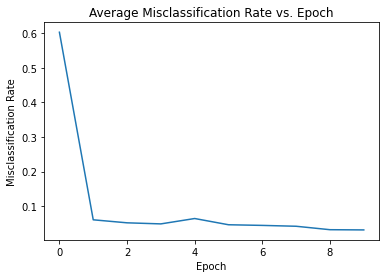

In [106]:
# Graph here
    
def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()
    
avg_miss = np.mean(misclass, axis=0)
plot_misclassification(avg_miss)

## 6. (10%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above and also one other data set of your choice.

- Report and compare your results.
- Try out some of the hyper-parameters that scikit-learn makes available on your own perceptron.

In [107]:


!curl https://raw.githubusercontent.com/rmorain/CS472-1/master/datasets/perceptron/voting-dataset.arff --output vote-dataset.arff
dataset = arff.loadarff("datasets/voting-dataset.arff")
data = pd.DataFrame(dataset[0], dtype=str)
X = data.drop(columns=['Class']).to_numpy()
y = data['Class'].to_numpy()

X = np.array([[1 if X[i][j]=="b\'y\'" else 0 for j in range(len(X[0]))] for i in range(len(X))])
y = np.array([1 if y[i] == "b'republican'" else 0 for i in range(len(y))])
cut_point = int(len(X) * 0.7)
data = {'Trial':[], 'Training Accuracy':[], 'Test Accuracy':[]}
misclass = []

def shuffler(X, y):
    z = np.column_stack([X, y])
    np.random.shuffle(z)
    return z[:,:-1], z[:,-1]

for i in range(5):
    data['Trial'].append(i)
    X_1, y_1 = shuffler(X, y)
    X_1_tr = X_1[:cut_point]
    X_1_test = X_1[cut_point:]
    y_1_tr = y_1[:cut_point]
    y_1_test = y_1[cut_point:]

    percep1 = Perceptron()
    percep1.fit(X_1_tr, y_1_tr)
    data['Training Accuracy'].append(percep1.score(X_1_tr,y_1_tr))
    data['Test Accuracy'].append(percep1.score(X_1_test,y_1_test))

df = pd.DataFrame(data)
print(df)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43825  100 43825    0     0   260k      0 --:--:-- --:--:-- --:--:--  259k
   Trial  Training Accuracy  Test Accuracy
0      0           0.978261       0.928058
1      1           0.978261       0.949640
2      2           0.928571       0.899281
3      3           0.950311       0.928058
4      4           0.978261       0.928058


the differences in training Accuracy and test Accuracy between the scikit-learn perceptron algorithm and my own seemed very minimal. I can't tell a difference.

## 7. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) or some other task with more than two possible output values. 

Note that the [iris data](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement either of the two most common ways to deal with this. For testing you just execute the novel instance on each model and combine the overall results to see which output class wins.